In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [73]:
df = pd.read_excel("drive/MyDrive/Colab Notebooks/data.xlsx")

df = df[["ХСН", "САД", "КСР", "QRS", "HCT", "PLT", "СКФ"]]
# Delete the lines without data
df = df.dropna()
df = df.to_numpy()

print(df)

[[  0.    170.     32.    ...  29.6   263.     40.   ]
 [  0.    100.     36.    ...  38.5   223.     69.3  ]
 [  0.    170.     22.    ...  35.4   189.     80.   ]
 ...
 [  1.    100.     66.    ...   0.355 288.     56.   ]
 [  1.    120.     40.    ...  27.7    90.     27.   ]
 [  1.    110.     52.    ...   0.366 173.     59.3  ]]


In [64]:
X = df[:, 1:]
y = df[:, 0]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9880952380952381


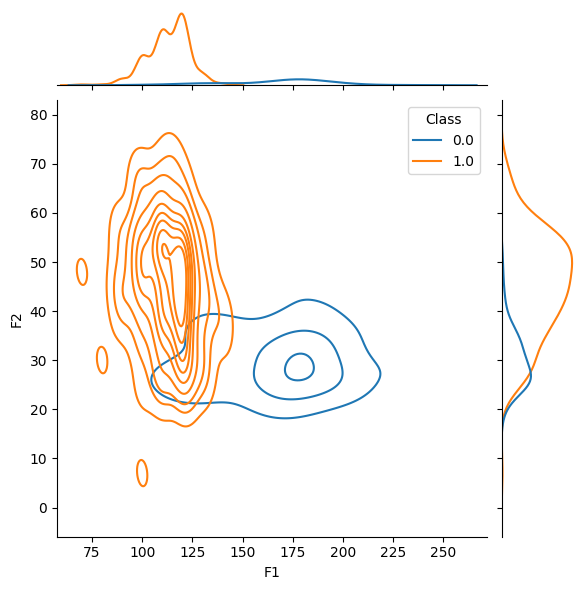

In [65]:
df = pd.DataFrame({'F1': X[:, 0],'F2': X[:, 1], 'Class': y})
sns.jointplot(data=df, x='F1', y='F2', hue='Class', kind='kde',)

<Axes: xlabel='F1', ylabel='F2'>

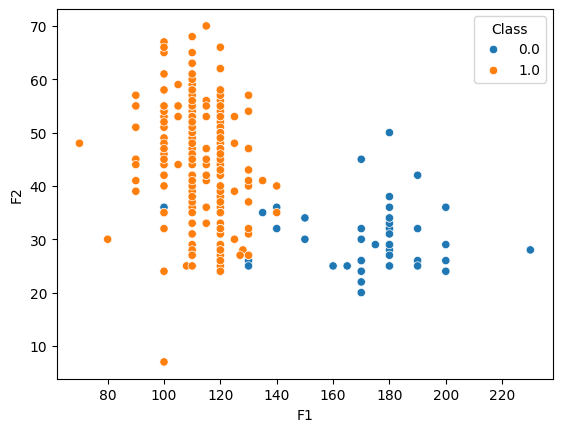

In [66]:
df = pd.DataFrame({'F1': X[:, 0],'F2': X[:, 1], 'Class': y})
sns.scatterplot(data=df, x="F1", y="F2", hue="Class")

In [71]:
random_patient_index = np.random.randint(0, X_test.shape[0])
random_patient = X_test[random_patient_index]

# Расчет вероятности принадлежности к больным
probabilities = model.predict_proba([random_patient])
patient_probability = 1 - probabilities[0][1]

print(f'Random patient features: {random_patient}')
print(f'Probability of being with ХСН: {patient_probability}')

Random patient features: [180.   28.  108.   33.6 233.   41.3]
Probability of being with ХСН: 0.9999999999996068


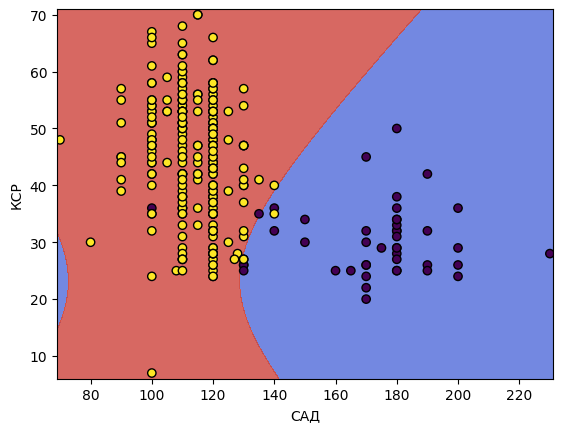

In [74]:
# Выбор признаков для обучения модели
X = X[:, [0, 1]]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели
model = GaussianNB()
model.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

# Предсказание для всех точек сетки
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel("САД")
plt.ylabel("КСР")
plt.show()
